Quantum computing is the manipulation of qubits to solve problems. Before we can delve into quantum computation, we need a framework for describing qubits and the things we can do to them. In this node, you will learn about the mathematical underpinnings of quantum computing. The key ingredients we need are:

- a mathematical representation of a qubit's state
- a means of measuring a qubit to determine what state it is in
- a way of manipulating the state to perform computation

Now this here's a matrix representation of qubits : <br> 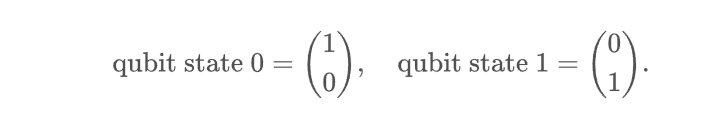 <br>

its a tedious one but in short hand we use 'Diract Notation' or the bra-ket notation <br>
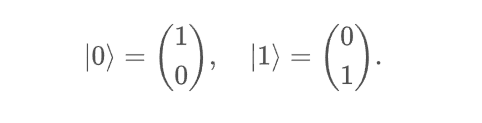

# Basis
- a basis is a set of vectors in vector space that spans a vector space, you can write anything else as a linear combination of those vector space 

# Measurement outcomes probabilities
-   In order to perform a meaningful quantum computation, we'll need a way to get information from the qubits at the end of an algorithm. That is, we need a way to measure qubits. Measurement in quantum computing is probabilistic.

- When we measure, we can't see whether a qubit is in a superposition, rather we observe the qubit either in state |0> or |1> state  The amplitudes  and  contain the information about the probability of each of those outcomes:

# Code of Inner product 
- When we multiply a complex number by its conjugate we get the real number 
<br>
<br>
- suppose we a qubit in position: <br><br>
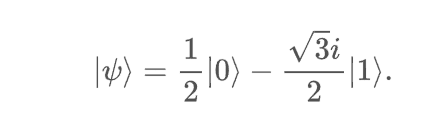 <br><br>
What is the probability of observing the qubit in |1> state? it will be this : <br><br>
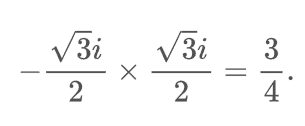

# Code: Normalizing a Non-normalized vector 

In [1]:
# A qubit with state of being in a superposition of |0> and |1> equally 

import numpy as np
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

alpha = 1 / np.sqrt(2)
beta = 1 / np.sqrt(2)
ket_superposition = alpha * ket_0 + beta * ket_1    
print("Superposition state vector:", ket_superposition)


Superposition state vector: [0.70710678 0.70710678]


In [2]:
import numpy as np
# Here are the vector representations of |0> and |1>
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """We are assuming the the alpha and the beta here are not normalized.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """
    
    norm = np.sqrt(abs(alpha)**2 + abs(beta)**2) 
    alpha_prime = alpha/norm   # dividing the alpha by the norm gives us the normalized value, similarly for beta.
    beta_prime = beta/norm 

    # RETURNING THE NORMALIZED VECTOR
    return np.array([alpha_prime,beta_prime])
    pass 

# Inner product
- A inner product should be real and positive for the same vector
- It shows that how similar two states are

In [3]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    return np.vdot(state_1, state_2)  # vdot takes conjugate of the first vector and does dot product


    return


# Testing my results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


- In the above results you can see, state <0|0> = 1 this means |0> is normalized. (length = 1)
- <0|1> This means |0> and |1> are orthogonal, They are completely different directions in space.
- again, <1|1> gives a 1, which means |1> is normalized.


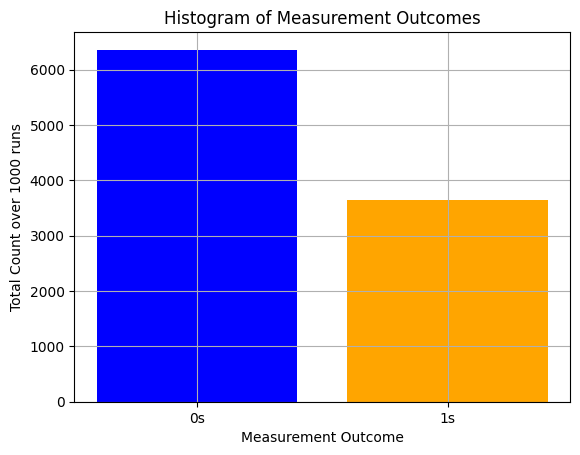

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def measure_state(state, num_meas):
    """Simulate a quantum measurement process."""
    p1 = np.abs(state[0]**2) 
    p2 = np.abs(state[1]**2)
    outcomes = np.random.choice([0, 1], size=num_meas, p=[p1, p2])
    return outcomes.tolist()

state = np.array([0.8, 0.6])

# Count total 0's and 1's
count_zero = 0
count_one = 0

for i in range(1000):
    outcomes = measure_state(state, 10)
    count_zero += outcomes.count(0)
    count_one += outcomes.count(1)

# Plot histogram
labels = ['0s', '1s']
counts = [count_zero, count_one]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Measurement Outcome')
plt.ylabel('Total Count over 1000 runs')
plt.title('Histogram of Measurement Outcomes')
plt.grid(True)
plt.show()


Quantum operations are nothing but Unitary matrices, meaning they always preserve the normalized nature of a state vector, for some 2 x 2 Complex valued unitary matrix U, the state of the qubit after an operation is: <br>
<br>
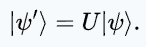

In [11]:
# U = np.array([[1, 1], [1, -1]]) / np.sqrt(2) 
import numpy as np
U = np.array([[0, 1], [1, 0]])


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """
    new_state = np.dot(U,state)

    return new_state
    pass

state =  np.array([0.6, 0.8])
new_state = apply_u(state)
print("New state after applying U:", new_state)
print('You can see the result is also a normalized state vector, since U is a unitary matrix and preserves the norm of the state vector.')

New state after applying U: [0.8 0.6]
You can see the result is also a normalized state vector, since U is a unitary matrix and preserves the norm of the state vector.


# Simulating our first gate: 
Now what will we do four our first experiment: 
- Initialize a qubit in state 
- Apply the provided operation U
- Simulate measuring the output state 100 times

In [12]:
from matplotlib import pyplot as plt
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2) # Hadamard gate


def initialize_state():
    ket_0 = np.array([1,0])
    return ket_0
    #STATE |0>
    pass


def apply_u(state):
    """quantum operation"""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    state = initialize_state()
    new_state = apply_u(state)
    states = measure_state(new_state,100)
    # PREPARING THE STATE, APPLYING U, THEN TAKING 100 MEASUREMENT SAMPLES
    return states
    pass

# RESULTS 
results = quantum_algorithm()   
print("Measurement results:", results)
print("Number of 0s:", np.sum(results == 0))
print("Number of 1s:", np.sum(results == 1))

Measurement results: [0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1]
Number of 0s: 55
Number of 1s: 45


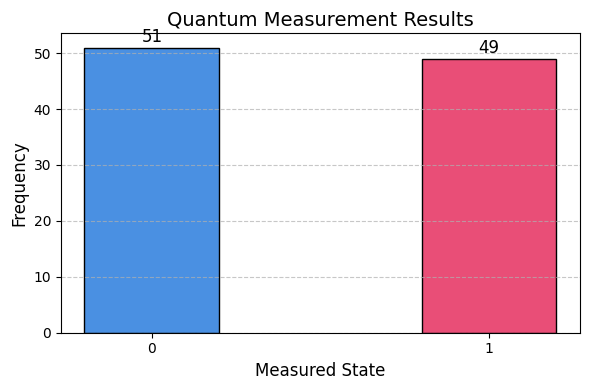

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Run the quantum simulation
results = quantum_algorithm()

# Count 0s and 1s
unique, counts = np.unique(results, return_counts=True)

# Create bar plot with nice visuals
colors = ['#4A90E2', '#E94E77']  # blue for 0, pink for 1
labels = ['0', '1']
width = 0.4

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=colors, width=width, edgecolor='black')

# Add count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', fontsize=12)

# Make it elegant
plt.title("Quantum Measurement Results", fontsize=14)
plt.xlabel("Measured State", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Basics ends here... time to to go for some `Quantum Circuits`! <br>
we can think quantum circuits like a recipe, or a set of instructions that tell you to what to do with a qubits and when to do it. By placing and performing the operations in  a certain way, we can realize different quantum algorithms! Have a look at this circuit: <br>
<br>
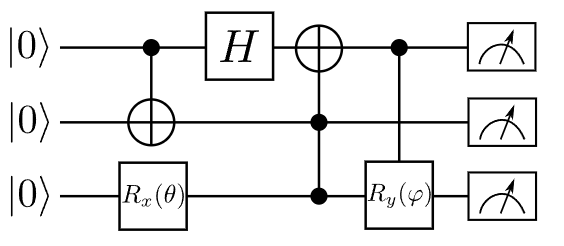

In [8]:
import pennylane as qml

def my_quantum_function(params):

        # Single-qubit operations with no input parameters
        qml.Gate1(wires=0)
        qml.Gate2(wires=1)

        # A single-qubit operation with an input parameter
        qml.Gate3(params[0], wires=0)

        # Two-qubit operation with no input parameter on wires 0 and 1
        qml.TwoQubitGate1(wires=[0, 1])
    
        # Two-qubit operation with an input parameter on wires 0 and 1
        qml.TwoQubitGate2(params[1], wires=[0, 1])

        # Return the result of a measurement
        return qml.Measurement(wires=[0, 1])

To understand it better lets make this circuit: <br><br>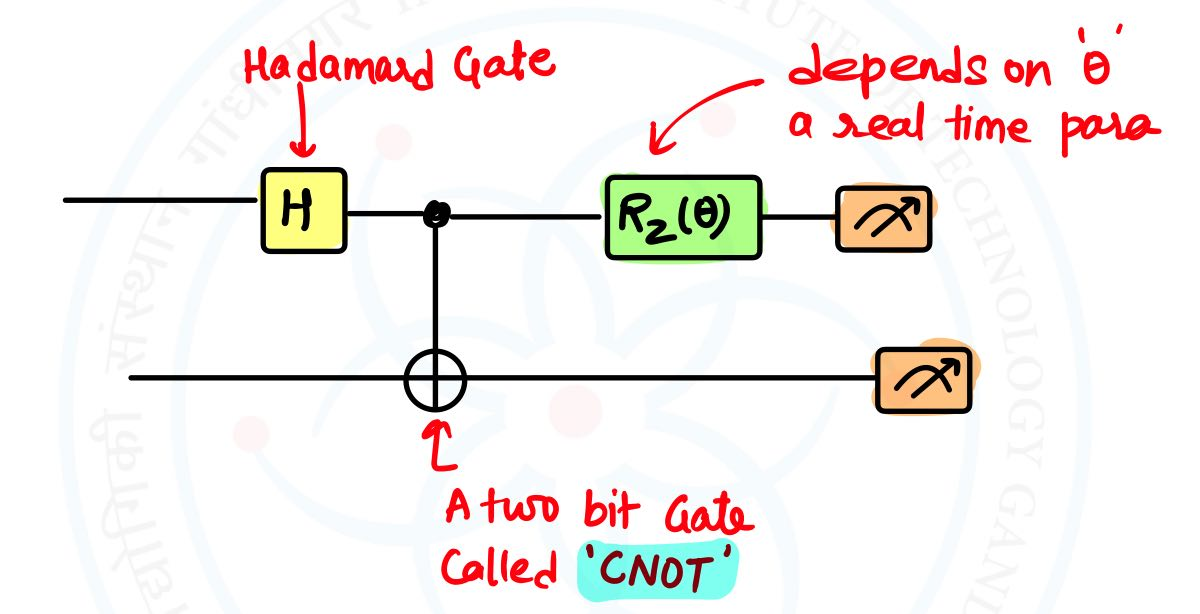

In [9]:
def my_first_circuit(theta):

    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RZ(theta, wires = 0)

    return qml.probs(wires = [0,1])


print(my_first_circuit(0.5))  # Example usage of the circuit with theta = 0.5

probs(wires=[0, 1])


Pennylane uses simulator, but we can run it on real quantum hardware using some plugins.    

In [10]:
import pennylane as qml
from pennylane import numpy as np

# creating a device with 2 wires
dev = qml.device("default.qubit", wires=2) # device needs a node which binds the circuit which we want to run. 

@qml.qnode(dev) # a node which combines the circuit to the device, and executes it.
def my_first_circuit(theta):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RZ(theta, wires=0)
    return qml.probs(wires=[0, 1])

# Test the circuit with theta = π/4
theta = np.pi / 4
output_probs = my_first_circuit(theta)

print("Probabilities:", output_probs)


Probabilities: [0.5 0.  0.  0.5]


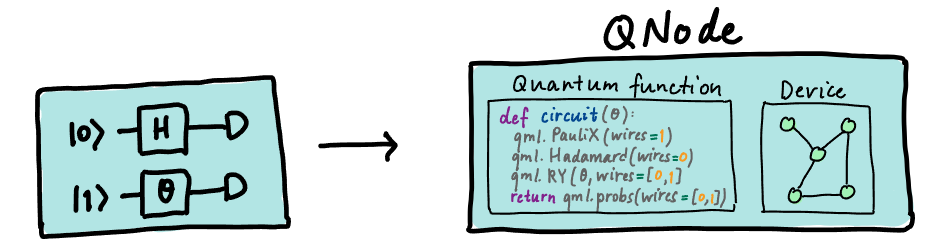

In [ ]:
dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev) # a decorator that binds the circuit to the device
def my_first_circuit(theta):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RZ(theta, wires=0)
    return qml.probs(wires=[0, 1])




The positions of lines and gate definitions changes the connections in a circuit, example: <br> <br>
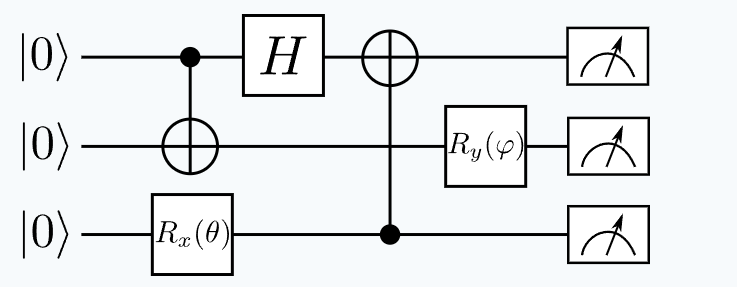 

In [ ]:
# This is the code for the circuit give above: 
import pennylane as qml

dev = qml.device('default.qubit', wires=3)  # Create a device with 3 wires 
@qml.qnode(dev)  # Decorator to bind the circuit to the device
def my_circuit(theta, phi): 
    qml.CNOT(wires=[0,1]) # a CNOT gate between qubit 0 and qubit 1, before Hadamard gate
    qml.RX(theta, wires=3)  # RX gate on qubit 0 with parameter theta
    qml.Hadamart(wires = 0) # Hadamard gate on qubit 0 after RX gate
    qml.CNOT(wires=[0,2]) # CNOT gate between qubit 0 and qubit 2
    qml.RY(phi, wires=1)  # RY gate on qubit 1 with parameter phi
    return qml.probs(wires=[0, 1, 2])  # Return the probabilities of measuring qubits 0, 1, and 2


